**Gradient Boosting:** Use the gradient method to focus the misclassified points.In the gradient decent we use the *first order derivative* to find the residual.

**Newton Boosting** Use the newton method to optimise the problem. in this we have to find the first and second derivative.


# Newton method for minimization:

In [1]:
import numpy as np
np.set_printoptions(precision=3)
from scipy.misc import derivative

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Slider

import inspect
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

mpl.rcParams["figure.figsize"] = (4, 3)
mpl.use("nbagg")

# Understanding the first derivative and second derivative

<img src="image/img_5.png">


In `gradient descent` first derivative information only allows us to construct a `local linear approximation` at best. While this gives us a descent direction, different step lengths can give us vastly different estimates, and ultimately slow down convergence.

Incorporating second derivative information, as `Newton descent` does, allows us to construct a `local quadratic approximation!` This extra information leads to a better local approximation, resulting in better steps and faster convergence.

In [2]:
def tangent_line(f_, a_, x_):
    return f_(a_) + derivative(f_, a_, 0.001) * (x_ - a_)


def parabola(f_, a_, x_):
    return f_(a_) + derivative(f_, a_, 0.001, 1) * (x_ - a_) + 0.5 * derivative(f_, a_, 0.001, 2) * (x_ - a_) ** 2

In [3]:
def f(x_):
    return x_ ** 2


x = np.linspace(-4, 4, 100)
y = f(x)
a = 2

fig, ax = plt.subplots()
ax.plot(x, y)
line_x = np.linspace(np.sign(a) * (np.abs(a) + 1), np.sign(a) * (np.abs(a) - 1), 20)
first_deriv, = ax.plot(line_x, tangent_line(f, 2, line_x))
fig.subplots_adjust(bottom=0.25)

ax_point = fig.add_axes([0.25, 0.1, 0.65, 0.03])
point_slider = Slider(
    ax=ax_point,
    label="Point",
    valmin=-3,
    valmax=+3,
    valinit=a,
)


# The function to be called anytime a slider's value changes
def update(val):
    line_x_ = np.linspace(np.sign(point_slider.val) * (np.abs(point_slider.val) + 1),
                          np.sign(point_slider.val) * (np.abs(point_slider.val) - 1), 20)
    first_deriv.set_xdata(line_x_)
    first_deriv.set_ydata(tangent_line(f, point_slider.val, line_x_))
    fig.canvas.draw_idle()


# register the update function with each slider
point_slider.on_changed(update)
plt.show()


<IPython.core.display.Javascript object>

In [4]:
def f(x_):
    return (x_ ** 4) - (x_ ** 3) - 7 * (x_ ** 2) + x_ + 6


a = -2.1
x = np.linspace(-2.5, 3, num=100)
fig, ax = plt.subplots()
ax.plot(x, f(x))
line_x = np.linspace(np.sign(a) * (np.abs(a) + 1), np.sign(a) * (np.abs(a) - 1), 20)
first_deriv, = ax.plot(line_x, tangent_line(f, a, line_x), label="$f^{1}$")
second_deriv, = ax.plot(line_x, parabola(f, a, line_x), label="$f^{2}$")
scatter_point = ax.scatter(a, f(a), s=20, c='k', zorder=3)
ax.set_ylim((-15, 15))
fig.subplots_adjust(bottom=0.25)

ax_point = fig.add_axes([0.25, 0.1, 0.65, 0.03])
point_slider = Slider(
    ax=ax_point,
    label="Point",
    valmin=-3,
    valmax=+3,
    valinit=a,
)


# The function to be called anytime a slider's value changes
def update(val):
    line_x_ = np.linspace(np.sign(point_slider.val) * (np.abs(point_slider.val) + 1),
                          np.sign(point_slider.val) * (np.abs(point_slider.val) - 1), 20)
    first_deriv.set_data(line_x_, tangent_line(f, point_slider.val, line_x_))
    second_deriv.set_data(line_x_, parabola(f, point_slider.val, line_x_))
    scatter_point.set_offsets([point_slider.val, f(point_slider.val)])
    fig.canvas.draw_idle()


# register the update function with each slider
point_slider.on_changed(update)
ax.legend()
plt.show()

<IPython.core.display.Javascript object>

Gradient update function:
$$w_{t+1}=w_t+\alpha_t \cdot\left(-f^{\prime}\left(w_t\right)\right)$$

here $\alpha_t$ is step length , usually we fix it, or we do line search, inorder to find the best step length.

Newton update function:
$$ w_{t+1}=w_t+\alpha_t \cdot\left(-\frac{f^{\prime}\left(w_t\right)}{f^{\prime \prime}\left(w_t\right)}\right)$$

here $\alpha_t$ is step length , usually we fix it to 1.

consider the function with three variable $f(x,y,z)$.

the first derivative of this function is called grad $\nabla f$ vector.
$$\nabla f=\left[\begin{array}{l}
\text { derivative of } f \text { w.r.t.x } \\
\text { derivative of } f \text { w.r.t. } y \\
\text { derivative of } f \text { w.r.t.z }
\end{array}\right]=\left[\begin{array}{l}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\frac{\partial f}{\partial z}
\end{array}\right] $$

the second derivative of th is function is called hessian matrix $\nabla^2 f$.hessian matrix is symmetric matrix.
$$\nabla^2 f=\left[\begin{array}{lll}
\frac{\partial}{\partial x}\left(\frac{\partial f}{\partial x}\right) & \frac{\partial}{\partial x}\left(\frac{\partial f}{\partial y}\right) & \frac{\partial}{\partial x}\left(\frac{\partial f}{\partial z}\right) \\
\frac{\partial}{\partial y}\left(\frac{\partial f}{\partial x}\right) & \frac{\partial}{\partial y}\left(\frac{\partial f}{\partial y}\right) & \frac{\partial}{\partial y}\left(\frac{\partial f}{\partial z}\right) \\
\frac{\partial}{\partial z}\left(\frac{\partial f}{\partial x}\right) & \frac{\partial}{\partial z}\left(\frac{\partial f}{\partial y}\right) & \frac{\partial}{\partial z}\left(\frac{\partial f}{\partial z}\right)
\end{array}\right]$$

finally we can write the newton methods as,
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t+\alpha_t \cdot\left(-\nabla^2 f\left(\boldsymbol{w}_t\right)^{-1} \nabla f\left(\boldsymbol{w}_t\right)\right) $$

1. matrix multiplication of hessian matrix inverse and grad vector.
2. for the large variable inverting the hessian matrix is time-consuming

# Newton method example

In [5]:
def branin(w_, *args, **kwargs):
    a_, b_, c_, r_, s_, t_ = args if not kwargs else kwargs.values()
    return (a_ * (w_[1] - b_ * w_[0] ** 2 + c_ * w_[0] - r_) ** 2) + (s_ * (1 - t_) * np.cos(w_[0])) + s_


args = dict(a=1, b=5.1 / (4 * np.pi ** 2), c=5 / np.pi, r=6, s=10, t=1 / (8 * np.pi))

In [6]:
def get_mesh(x_min_, x_max_, y_min_, y_max_, grid_resolution_=100):
    e = 0.25
    x_mesh_, y_mesh_ = np.meshgrid(np.linspace(x_min_ - e, x_max_ + e, grid_resolution_),
                                   np.linspace(y_min_ - e, y_max_ + e, grid_resolution_))
    return x_mesh_, y_mesh_, np.c_[x_mesh_.ravel(), y_mesh_.ravel()]

In [7]:
def plot_surface(ax_, f_, x_min_, x_max_, y_min_, y_max_, args_, gird_resolutions_=100, draw_contour=False, levels=None,offset=0,predict=False,cmap="viridis"):
    if levels is None and draw_contour:
        levels = np.array([30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175])
    x_mesh_, y_mesh_, grid_ = get_mesh(x_min_, x_max_, y_min_, y_max_, gird_resolutions_)
    if predict:
        z_mesh_ = f_(grid_).reshape(x_mesh_.shape)
    else:
        z_mesh_ = np.apply_along_axis(f_, 1, grid_, **args_).reshape(x_mesh_.shape)
    # ax_.set_position([0.025, 0.15, 0.5, 0.9])
    ax_.plot_surface(x_mesh_, y_mesh_, z_mesh_, rstride=10, cstride=10, alpha=0.6, linewidth=0.25, edgecolors='k', cmap=cmap)
    # ax_.view_init(elev=25.0, azim=-100.0)
    if draw_contour:
        ax_.contour(x_mesh_, y_mesh_, z_mesh_,levels=levels,cmap="viridis",alpha=0.5,offset=offset)

In [8]:
def plot_contour(ax_, f_, x_min_, x_max_, y_min_, y_max_, args_, gird_resolutions_=100,
                 levels=np.array([1, 2, 4, 7, 12, 20, 50, 75, 125, 175])):
    x_mesh_, y_mesh_, grid_ = get_mesh(x_min_, x_max_, y_min_, y_max_, gird_resolutions_)
    z_mesh_ = np.apply_along_axis(f_, 1, grid_, **args_).reshape(x_mesh_.shape)
    ctr = ax_.contour(x_mesh_, y_mesh_, z_mesh_, levels=levels, cmap="viridis",
                      alpha=0.5)
    return ctr

In [9]:
x_min, x_max, y_min, y_max = -5, 18, -10, 18

plt.figure(figsize=(7, 4))

# plot surface
ax = plt.subplot(121, projection="3d")
plt.setp(ax, xlabel=f'$w_1$', ylabel='$w_2$', zlabel='$f(w_1, w_2)$',
         xlim=(x_min, x_max), ylim=(y_min, y_max), zlim=(-50, 400),
         title='Branin function: surface')
plot_surface(ax, branin, x_min, x_max, y_min, y_max, args,draw_contour=True,levels=np.array([1, 2, 4, 7, 12, 20, 50, 75, 125, 175]),offset=-50)
ax.view_init(elev=28,azim=-84)

# plot contour
ax = plt.subplot(122)
plt.setp(ax, xlabel=f'$w_1$', ylabel='$w_2$',
         xlim=(x_min, x_max), ylim=(y_min, y_max),
         title='Branin function: contours')
plot_contour(ax, branin, x_min, x_max, y_min, y_max, args)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [10]:
from sympy import symbols, IndexedBase, Idx, cos, Derivative, lambdify, Matrix, hessian, matrix2numpy, Basic
import sympy as sp
from sympy.utilities.lambdify import lambdastr

w_sy = IndexedBase("w")
a_sy, b_sy, c_sy, r_sy, s_sy, t_sy = symbols("a, b, c, r, s, t")

In [11]:
branin_func = (a_sy * (w_sy[1] - b_sy * w_sy[0] ** 2 + c_sy * w_sy[0] - r_sy) ** 2) + (
        s_sy * (1 - t_sy) * cos(w_sy[0])) + s_sy
branin_func

a*(-b*w[0]**2 + c*w[0] - r + w[1])**2 + s*(1 - t)*cos(w[0]) + s

In [12]:
branin_func.diff(w_sy[0]).doit()

a*(-4*b*w[0] + 2*c)*(-b*w[0]**2 + c*w[0] - r + w[1]) - s*(1 - t)*sin(w[0])

In [13]:
lambdastr((w_sy, a_sy, b_sy, c_sy, r_sy, s_sy, t_sy),
          branin_func.diff(w_sy[0]).doit(),
          )

'lambda w,a,b,c,r,s,t: (a*(-4*b*w[0] + 2*c)*(-b*w[0]**2 + c*w[0] - r + w[1]) - s*(1 - t)*math.sin(w[0]))'

In [14]:
[lambdify((a_sy, b_sy, c_sy, r_sy, s_sy, t_sy, w_sy), branin_func.diff(w_sy[i]).doit(), modules="numpy") for i in
 range(2)]

[<function _lambdifygenerated(a, b, c, r, s, t, Dummy_22)>,
 <function _lambdifygenerated(a, b, c, r, s, t, Dummy_23)>]

In [15]:
Matrix([branin_func]).jacobian(Matrix([w_sy[i] for i in range(2)]))

Matrix([[a*(-4*b*w[0] + 2*c)*(-b*w[0]**2 + c*w[0] - r + w[1]) - s*(1 - t)*sin(w[0]), a*(-2*b*w[0]**2 + 2*c*w[0] - 2*r + 2*w[1])]])

In [16]:
grad = Matrix([branin_func.diff(w_sy[i]).doit() for i in range(2)])
grad

Matrix([
[a*(-4*b*w[0] + 2*c)*(-b*w[0]**2 + c*w[0] - r + w[1]) - s*(1 - t)*sin(w[0])],
[                                a*(-2*b*w[0]**2 + 2*c*w[0] - 2*r + 2*w[1])]])

In [17]:
branin_gradient = lambdify((w_sy, a_sy, b_sy, c_sy, r_sy, s_sy, t_sy),
                           Matrix([branin_func.diff(w_sy[i]).doit() for i in range(2)]),
                           modules="numpy")
branin_gradient

<function _lambdifygenerated(_Dummy_24, a, b, c, r, s, t)>

In [18]:
def branin_gradient(w, *args, **kwargs):
    """
    Wrapping the lambdify function because it returns (2,1) axis not (2,) so squeeze it.
    """
    grad_ = lambdify((w_sy, a_sy, b_sy, c_sy, r_sy, s_sy, t_sy),
                     Matrix([branin_func.diff(w_sy[i]).doit() for i in range(2)]),
                     modules="numpy")
    return grad_(w, *args, **kwargs).squeeze()

In [19]:
branin_gradient([1, 2], **args).shape

(2,)

In [20]:
lambdastr((w_sy, a_sy, b_sy, c_sy, r_sy, s_sy, t_sy),
          Matrix([branin_func.diff(w_sy[i]).doit() for i in range(2)]))

'lambda w,a,b,c,r,s,t: (ImmutableDenseMatrix([[a*(-4*b*w[0] + 2*c)*(-b*w[0]**2 + c*w[0] - r + w[1]) - s*(1 - t)*math.sin(w[0])], [a*(-2*b*w[0]**2 + 2*c*w[0] - 2*r + 2*w[1])]]))'

In [21]:
lambdify((w_sy, a_sy, b_sy, c_sy, r_sy, s_sy, t_sy), hessian(branin_func, [w_sy[i] for i in range(2)]))

<function _lambdifygenerated(_Dummy_26, a, b, c, r, s, t)>

In [22]:
branin_hessian = lambdify((w_sy, a_sy, b_sy, c_sy, r_sy, s_sy, t_sy), hessian(branin_func, [w_sy[i] for i in range(2)]))
branin_hessian

<function _lambdifygenerated(_Dummy_27, a, b, c, r, s, t)>

In [23]:
branin_hessian([3, -4], **args)

array([[14.14 ,  1.633],
       [ 1.633,  2.   ]])

In [24]:
def newton_descent(g_func_, h_func_, w_init_, max_iter_=100, f_args=None):
    if f_args is None:
        f_args = dict()
    n_iter_ = 0
    w_cur_ = w_init_
    descent_path_ = np.full((max_iter_ + 1, 2), np.nan)
    descent_path_[n_iter_] = w_cur_

    while True:
        n_iter_ += 1
        # compute the gradient
        gradient_, hessian_ = g_func_(w_cur_, **f_args), h_func_(w_cur_, **f_args)
        # print(gradient_.shape,hessian_.shape)
        # compute the newton direction
        direction_ = - np.dot(np.linalg.inv(hessian_), gradient_)
        # default distance
        distance_ = 0.5
        # update the w
        w_next_ = w_cur_ + distance_ * direction_
        # print(w_next_)
        descent_path_[n_iter_] = w_next_

        err_ = np.linalg.norm(w_next_ - w_cur_)
        if err_ <= 1e-3 or n_iter_ >= max_iter_:
            break

        w_cur_ = w_next_

    return w_next_, descent_path_

In [25]:
from scipy.optimize import line_search


def gradient_descent(func_, g_func_, w_init_, max_iter_=100, f_args=None):
    if f_args is None:
        f_args = dict()

    n_iter_ = 0
    w_cur_ = w_init_
    descent_path_ = np.full((max_iter_ + 1, 2), np.nan)
    descent_path_[n_iter_] = w_cur_

    while True:
        n_iter_ += 1
        # compute the negative gradient
        gradient_ = - g_func_(w_cur_, **f_args)
        # normalize the gradient
        direction_ = gradient_ / np.linalg.norm(gradient_)

        # compute the step we need to take
        step_ = line_search(func_, g_func_, w_cur_, direction_, args=f_args.values())

        if step_[0] is None:
            distance_ = 1.0
        else:
            distance_ = step_[0]

        # update the w
        w_next_ = w_cur_ + distance_ * direction_
        descent_path_[n_iter_] = w_next_

        err_ = np.linalg.norm(w_next_ - w_cur_)
        if err_ <= 1e-3 or n_iter_ >= max_iter_:
            break

        w_cur_ = w_next_

    return w_next_, descent_path_

In [26]:
w_init = np.array([2, -5])
w_newton_optimal, w_newton_path = newton_descent(branin_gradient, branin_hessian, w_init, f_args=args)
print(w_newton_optimal)

[3.141 2.274]


In [27]:
w_gradient_optimal, w_gradient_path = gradient_descent(branin, branin_gradient, w_init, f_args=args)
print(w_gradient_optimal)

[3.142 2.274]


In [28]:
plt.figure(figsize=(7, 3))

x_min, x_max, y_min, y_max = -5, 18, -10, 18
ax = plt.subplot(121)
plt.setp(ax, xlabel="$w_1$", ylabel="$w_2$",
         xlim=(x_min, x_max), ylim=(y_min, y_max),
         title="Newton vs gradient")
plot_contour(ax, branin, x_min, x_max, y_min, y_max, args)

# start and end point
ax.scatter(w_init[0], w_init[1], c="b", s=10, zorder=3)
ax.scatter(w_newton_optimal[0], w_newton_optimal[1], c="r", s=10, zorder=3)

# newton path
ax.plot(w_newton_path[:, 0], w_newton_path[:, 1], label="Newton path")

# gradient path
ax.plot(w_gradient_path[:, 0], w_gradient_path[:, 1], label="Gradient path")
ax.legend()

# zoomed view
x_min, x_max, y_min, y_max = 0, 5, -6, 4
ax = plt.subplot(122)
plt.setp(ax, xlabel="$w_1$", ylabel="$w_2$",
         xlim=(x_min, x_max), ylim=(y_min, y_max), title="Newton vs gradient (zoomed)")
plot_contour(ax, branin, x_min, x_max, y_min, y_max, args)

# start and end point
ax.scatter(w_init[0], w_init[1], c="b", s=10, zorder=3)
ax.scatter(w_newton_optimal[0], w_newton_optimal[1], c="r", s=10, zorder=3)

# newton path
ax.plot(w_newton_path[:, 0], w_newton_path[:, 1], label="Newton path")

# gradient path
ax.plot(w_gradient_path[:, 0], w_gradient_path[:, 1], label="Gradient path")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

The result of this comparison is pretty striking: Newton descent is able to exploit the additional local information about the curvature of the function provided by the Hessian matrix to take a more direct path to the solution.

In contrast, gradient descent only has the first-order gradient information to work with and takes a roundabout path to the same solution.

## Proprieties of Newton Method

1. Here step length can be interpreted as the learning rate in the Newton Boosting. This is contrast with the Gradient Boosting there we need to calculate the step length ($\alpha$) and we have learning rate ($\eta$)
2. We have the bigger issue with the newton method , it easily moves to saddle point.
>**Saddle point:**
>   saddle point mimics a local minimizer: at both locations, the gradient of the function becomes zero. However, saddle points are not true local minimizes: the saddle-like shape means that it is curving upwards in one direction and curving downwards in another. This is in contrast to local minimizes which are bowl-shaped.

However, both local minimizes and saddle points have zero gradients. This means that descent algorithms cannot distinguish between them and sometimes converge to saddle points instead of minimizes.

In [29]:
w_init = np.array([5, 7])
w_newton_optimal, w_newton_path = newton_descent(branin_gradient, branin_hessian, w_init, f_args=args)

plt.figure(figsize=(7, 4))

# visualise the saddle point on surface
x_min, x_max, y_min, y_max = 1.5, 10, -5, 7.5

ax = plt.subplot(121, projection="3d")
plt.setp(ax, xlabel=f'$w_1$', ylabel='$w_2$', zlabel='$f(w_1, w_2)$',
         xlim=(x_min, x_max), ylim=(y_min, y_max), zlim=(-50, 100),
         title='Branin function: saddle point')
plot_surface(ax, branin, x_min, x_max, y_min, y_max, args)
ax.scatter(w_newton_optimal[0], w_newton_optimal[1], branin(w_newton_optimal, **args),
           c="r", s=20)

ax = plt.subplot(122)
plt.setp(ax, xlabel=f'$w_1$', ylabel='$w_2$',
         xlim=(x_min, x_max), ylim=(y_min, y_max),
         title='Newton descent to saddle point')
plot_contour(ax, branin, x_min, x_max, y_min, y_max, args)
ax.scatter(w_init[0], w_init[1], c='b', s=20)
ax.plot(w_newton_path[:, 0], w_newton_path[:, 1])
ax.scatter(w_newton_optimal[0], w_newton_optimal[1], c='r', s=20)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In surface plot we can see that saddle point look like exactly like the local minimum . [left -> right]

## Newton Descent over Loss Function for training using Sympy

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=[[-1.5, -1.5], [1.5, 1.5]],
                  random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

<IPython.core.display.Javascript object>

In [31]:
# using the square loss
n_sy, m_sy = sp.symbols("n m")
X_sy = sp.MatrixSymbol("X", n_sy, m_sy)
y_sy = sp.MatrixSymbol("y", n_sy, 1)
w_sy = sp.MatrixSymbol("w", m_sy, 1)

w_init = np.array([0.0, -0.99])


In [32]:
lambdastr((X_sy, w_sy), 0.5 * X_sy * w_sy)

'lambda X,w: (0.5*X*w)'

In [33]:
inspect.getsource(lambdify((X_sy, w_sy), 0.5 * X_sy * w_sy))

'def _lambdifygenerated(X, w):\n    return (X).dot(w).dot(0.5)\n'

In [34]:
lambdastr((w_sy, X_sy, y_sy), 0.5 * (sp.MatMul((y_sy - sp.MatMul(X_sy, w_sy)).T, (y_sy - X_sy * w_sy))))

'lambda w,X,y: (0.5*(-w.T*X.T + y.T)*(-X*w + y))'

In [35]:
sl_sy = 0.5 * (sp.MatMul((y_sy - sp.MatMul(X_sy, w_sy)).T, (y_sy - X_sy * w_sy)))
sl_sy

0.5*(-w.T*X.T + y.T)*(-X*w + y)

In [36]:
sl_func = sp.lambdify((w_sy, X_sy, y_sy), sl_sy, modules="numpy")
sl_func

<function _lambdifygenerated(w, X, y)>

In [37]:
try:
    sl_func(w_init, X, y)
except AttributeError as ex:
    print(ex)

'numpy.float64' object has no attribute 'dot'


In [38]:
inspect.getsource(sl_func)

'def _lambdifygenerated(w, X, y):\n    return ((w.T).dot(X.T).dot(-1) + y.T).dot((X).dot(w).dot(-1) + y).dot(0.5)\n'

In [39]:
def sl_func_modified(w, *args, **kwargs):
    loss_ = (sp.MatMul((y_sy - sp.MatMul(X_sy, w_sy)).T, (y_sy - X_sy * w_sy)))
    func_ = sp.lambdify((w_sy, X_sy, y_sy), loss_, modules="numpy")
    return 0.5 * func_(w, *args, **kwargs)

In [40]:
def squared_loss(w, X, y):
    return 0.5 * np.sum((y - np.dot(X, w)) ** 2)

In [41]:
sl_grad_sy = sl_sy.diff(w_sy)
sl_grad_sy

-1.0*X.T*(-X*w + y)

In [42]:
sl_grad_func = sp.lambdify((w_sy, X_sy, y_sy), sl_grad_sy, modules="numpy")
sl_grad_func

<function _lambdifygenerated(w, X, y)>

In [43]:
sl_hess_sy = sl_sy.diff(w_sy, 2)
sl_hess_sy

X.T*X

In [44]:
sl_hess_func = sp.lambdify((w_sy, X_sy, y_sy), sl_hess_sy, modules="numpy")
sl_hess_func

<function _lambdifygenerated(w, X, y)>

In [45]:
from numpy import dot

sq_args = dict(X=X, y=y)
w_init = np.array([0.0, -0.99])
w_newton_optimal, w_newton_path = newton_descent(sl_grad_func, sl_hess_func, w_init, f_args=sq_args)
w_gradient_optimal, w_gradient_path = gradient_descent(sl_func_modified, sl_grad_func, w_init, f_args=sq_args)
w_newton_optimal, w_gradient_optimal

(array([0.135, 0.139]), array([0.136, 0.139]))

In [46]:
y_pred = (np.dot(X, w_newton_optimal) >= 0).astype(int)
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.995

In [47]:
def plot_decision(ax_, grad_, x_min_, x_max_, y_min_, y_max_, gird_resolutions_=100):
    x_mesh_, y_mesh_, grid_ = get_mesh(x_min_, x_max_, y_min_, y_max_, gird_resolutions_)
    z_mesh_ = (np.dot(grid_,grad_).reshape(x_mesh_.shape)+1)/2
    ax_.contourf(x_mesh_, y_mesh_, z_mesh_, alpha=0.5, cmap="RdBu")
    ax_.contour(x_mesh_, y_mesh_, z_mesh_, levels=[0.5],colors="k")


In [48]:
X, y = make_blobs(n_samples=200, n_features=2, centers=[[-1.5, -1.5], [1.5, 1.5]],
                  random_state=42)
plt.figure(figsize=(5,5))
# visual the contour plot
ax = plt.subplot(221)

x_min, x_max, y_min, y_max = -1, 1, -1, 1
plt.setp(ax, xlim=(x_min, x_max), ylim=(y_min, y_max),
         title="Newton vs gradient")
plot_contour(ax, squared_loss, x_min, x_max, y_min, y_max, sq_args,
             levels=np.array([25, 50, 100, 150, 200, 300, 400, 600, 800, 1000]))
ax.scatter(w_init[0], w_init[1], c="b", s=20)
ax.plot(w_newton_path[:, 0], w_newton_path[:, 1], label="newton path")
ax.plot(w_gradient_path[:, 0], w_gradient_path[:, 1], label="gradient path")
ax.scatter(w_newton_optimal[0], w_newton_optimal[1], c="r", s=20)
ax.legend()

ax = plt.subplot(222)
x_min, x_max, y_min, y_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
plt.setp(ax, xlim=(x_min, x_max), ylim=(y_min, y_max),
         title="optimized by newton")
plot_decision(ax,w_newton_optimal,x_min, x_max, y_min, y_max )
ax.scatter(X[:,0],X[:,1],c=y,cmap="RdBu",alpha=0.75)

ax = plt.subplot(223)
x_min, x_max, y_min, y_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
plt.setp(ax, xlim=(x_min, x_max), ylim=(y_min, y_max),
         title="optimized by gradient")
plot_decision(ax,w_gradient_optimal,x_min, x_max, y_min, y_max )
ax.scatter(X[:,0],X[:,1],c=y,cmap="RdBu",alpha=0.75)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

# Newton Boosting

## Intuition : Learning with weighted residuals

1. **Adaboost:** weak learner will focus misclassified points,by giving `weights to observation` that proportional to accuracy.
2. **Gradient Boosting:** weak learner will focus misclassified points,by computing the residual , its another way to measure the extent of misclassification, this done through `negative gradient of loss function`.
3. **Newton Boosting:** Combine the both `Adaboost + Gradient Boosting` ,it uses the `weighted residual`.`first derivative compute as same as gradient boosting` which is noting but the residual of the observation. `second derivative is similar to adaboost` , its give weights to the residual
4. Gradient ---> Residual , Hessian --> weights


**How hessian is similar to weights?**
1. Inverting the matrix is will have high computational cost.to avoid that we will we calculate `one obseravtion at a time`.
2. For single training example , `the second derivative will be scalar`,then the ${He}^{-1} * g_t$ becomes $g_t(x_i)/{He}^{-1}(x_i)$,
3. this look like we're giving weights to residuals.
4. In summary, Newton boosting uses Hessian-weighted residuals, while gradient boosting uses unweighted residuals

### What do the hessians add?

second derivative corresponds to the `curvature at given point`

In [49]:
def f(x_):
    return (x_ ** 4) - (x_ ** 3) - 7 * (x_ ** 2) + x_ + 6


a = -2.1
x = np.linspace(-2.5, 3, num=100)
fig, ax = plt.subplots()
ax.plot(x, f(x))
line_x = np.linspace(np.sign(a) * (np.abs(a) + 1), np.sign(a) * (np.abs(a) - 1), 20)
first_deriv, = ax.plot(line_x, tangent_line(f, a, line_x), label="$f^{1}$")
second_deriv, = ax.plot(line_x, parabola(f, a, line_x), label="$f^{2}$")
scatter_point = ax.scatter(a, f(a), s=20, c='k', zorder=3)
text_f_deriv = plt.text(-.65,-5,s=f"f ={derivative(f,a,n=1)}")
text_s_deriv = plt.text(-.65,-10,s=f"s ={derivative(f,a,n=2)}")
ax.set_ylim((-15, 15))
fig.subplots_adjust(bottom=0.25)

ax_point = fig.add_axes([0.25, 0.1, 0.65, 0.03])
point_slider = Slider(
    ax=ax_point,
    label="Point",
    valmin=-3,
    valmax=+3,
    valinit=a,
)


# The function to be called anytime a slider's value changes
def update(val):
    line_x_ = np.linspace(np.sign(point_slider.val) * (np.abs(point_slider.val) + 1),
                          np.sign(point_slider.val) * (np.abs(point_slider.val) - 1), 20)
    first_deriv.set_data(line_x_, tangent_line(f, point_slider.val, line_x_))
    second_deriv.set_data(line_x_, parabola(f, point_slider.val, line_x_))
    scatter_point.set_offsets([point_slider.val, f(point_slider.val)])
    text_f_deriv.set_text(f"f ={int(derivative(f,point_slider.val,dx=0.001,n=1))}")
    text_s_deriv.set_text(f"s ={int(derivative(f,point_slider.val,dx=0.001,n=2,order=5))}")
    fig.canvas.draw_idle()


# register the update function with each slider
point_slider.on_changed(update)
ax.legend()
plt.show()

<IPython.core.display.Javascript object>

1. large value of second derivative,implies that the curvature at that point is high, so hessian decrease the gradient , this lead to newton boosting to tak smaller steps
2. if the second derivative Het(xi) is small, then the curvature at xi is small, meaning that the function is rather flat. In such situations, the Hessian weight allows Newton descent to take large, bolder steps so it can traverse the flat area faster.

Curvature is larger ---> smaller step (because we will fall)
In flat region ----> we can take large step (we can run in flat surface)

### Combining the second derivative with the first derivative.

second derivatives combined with first-derivative residuals can capture the notion of “misclassification” very effectively

In [50]:
x_sy = sp.Symbol("x")
log_loss_sy = sp.log(1+sp.exp(-x_sy))
log_loss_sy

log(1 + exp(-x))

In [51]:
log_loss_grad_sy = log_loss_sy.diff(x_sy)
log_loss_grad_sy

-exp(-x)/(1 + exp(-x))

In [52]:
log_loss_hess_sy = sp.simplify(log_loss_grad_sy.diff(x_sy))
log_loss_hess_sy

exp(x)/(exp(2*x) + 2*exp(x) + 1)

In [53]:
weighted_residual_sy = sp.simplify(-log_loss_grad_sy/log_loss_hess_sy)
weighted_residual_sy

1 + exp(-x)

In [54]:
log_loss_fn = sp.lambdify(x_sy,log_loss_sy,modules="numpy")
log_loss_grad_fn = sp.lambdify(x_sy,log_loss_grad_sy,modules="numpy")
log_loss_hess_fn = sp.lambdify(x_sy,log_loss_hess_sy,modules="numpy")
weighted_residual_fn = sp.lambdify(x_sy,weighted_residual_sy,modules="numpy")

In [55]:
x = np.linspace(-5,5,100)
plt.plot(x,log_loss_fn(x),label="Logistic loss")
plt.xlabel("misclassification margin $y.f(x)$")
plt.ylabel("loss")
plt.tight_layout()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [56]:
plt.plot(x,log_loss_fn(x),label="Logistic loss",ls="--")
plt.plot(x,-log_loss_grad_fn(x),label="negative gradient",ls="--")
plt.plot(x,log_loss_hess_fn(x),label="hessian")
plt.xlabel("misclassification margin $y.f(x)$")
plt.ylabel("loss,grad,hessian")
plt.tight_layout()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

1. if $y$ and $f(x)$ are in opposite sign then $y.f(x) < 0$.This means that true label and predict label are different, and `we have misclassification`.
2. the left part of log loss , tell us that the `log loss increasing as misclassification margin is increasing`.right part of the log loss is nearly zero for correctly classified points .that is `log loss measure the extent of the misclassification`.
3. for the hessian , the highest value is achieved around the zero , as the curve is maximum.


In [57]:
plt.figure(figsize=(6,4))
plt.plot(x,log_loss_fn(x),label="Logistic loss",ls="--")
plt.plot(x,log_loss_hess_fn(x),label="hessian",ls="--")
plt.plot(x,-log_loss_grad_fn(x),label="negative gradient",ls="--")
plt.plot(x,weighted_residual_fn(x),label="scaled negative gradient")
plt.xlabel("misclassification margin $y.f(x)$")
plt.ylabel("loss,grad,hessian")
plt.ylim((0,5))
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

Now we can see the effect of the weighted gradient.
1. For well classified point, the negative gradient and weighted negative gradient is around zero.so the upcoming weak learner dont focus on the well classified point.
2. For misclassification point,negative gradient is stays as 1 where as the weight negative gradient it steeply increases. this make the upcoming weak learner to focus more on the misclassified point.

> answer to the question of **What the hessians do?**
>  They incorporate local curvature information to ensure that training examples that are badly misclassified get higher weights

In [58]:
x = np.linspace(-2,6,100)
z = np.linspace(-2,4,15)

plt.figure(figsize=(6,3))
# gradient as residual
ax = plt.subplot(121)
plt.setp(ax,xlabel="misclassification margin $y.f(x)$",ylabel="loss & gradient",
         xlim=(-3,7),ylim=(-.1,2.1),title="Gradient as residual")
ax.plot(x,log_loss_fn(x),lw=3)
for u in z:
    ax.arrow(u,log_loss_fn(u),-log_loss_grad_fn(u),0.0,lw=0.5,head_length=0.5,head_width=0.02)

# Hessian weighted Gradient as residual
ax = plt.subplot(122)
plt.setp(ax,xlabel="misclassification margin $y.f(x)$",ylabel="loss & weighted gradient",
         xlim=(-3,7),ylim=(-.1,2.1),title="Hessian weighted Gradient as residual")
ax.plot(x,log_loss_fn(x),lw=3)
for u in z:
    ax.arrow(u,log_loss_fn(u),weighted_residual_fn(u),0.0,lw=0.5,head_length=0.5,head_width=0.02)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

Hessian-weighting of residuals ensures that training examples that are further to the left
will get higher weights. This is in sharp contrast to gradient boosting, which is unable to differentiate training examples as effectively as it only uses unweighted residuals.

To summarize: Newton boosting aims to use both first derivative (gradient) information and second derivative (Hessian) information to ensure that misclassified training examples receive focus based on the extent of the misclassification.

### Intuition: Learning with Regularized Loss Functions

Regularizing a loss function introduces additional structure to the learning problem, which often stabilizes and accelerates learning algorithms. Regularization also allows us to control the complexity of the model being learned and improves overall robustness and generalization capabilities of the model.

`Regularized loss function explicitly captures the fit vs. complexity tradeoff inherent in most machine-learning models`

$$\lambda \cdot \underbrace{\text { regularization }(\mathbf{f}(\mathbf{x}))}_{\text {measures model complexity }}+\underset{\text { measures model fit }}{\operatorname{loss}(\mathbf{f}(\mathbf{x}), \text { data })}$$

>The regularization term measures the flatness (the opposite of “curviness”) of the model: the more it is minimized, the less complex the learned model is.

In [59]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=13)
y = 2 * y - 1

In [60]:
def regularized_loss(w_,X_,y_):
    return np.sum(1 / (1 + np.exp(-y_ * np.dot(X_, w_)))) + 0.1 * np.dot(w_,w_)

def unregularized_loss(w_,X_,y_):
    return np.sum(1 / (1 + np.exp(-y_ * np.dot(X_, w_))))

In [61]:
log_loss_args = dict(X_=X,y_=y)
x_min, x_max, y_min, y_max = -20, 15, -15, 30


fig = plt.figure(figsize=(7, 3))
# regularized loss surface
ax = plt.subplot(121,projection="3d")
plt.setp(ax,title="Un-Regularized Loss",
         xlabel="$w_1$",ylabel="$w_2$",
         xlim=(-20,15),zlim=(0,300))
plot_surface(ax,unregularized_loss,x_min, x_max, y_min, y_max,log_loss_args,draw_contour=True)
ax.view_init(elev=3.0, azim=33.0)


ax = plt.subplot(122,projection="3d")
plt.setp(ax,title="Regularized Loss",
         xlabel="$w_1$",ylabel="$w_2$",
         xlim=(-20,15),zlim=(0,300))
plot_surface(ax,regularized_loss,x_min, x_max, y_min, y_max,log_loss_args,draw_contour=True)
ax.view_init(elev=3, azim=54.0)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

regularized loss function contains an additional smoothing term along with the loss function, making it more convex, or bowl-like

In [62]:
sp.init_printing()

In [63]:
y_sy,F_sy,lambda_sy = sp.symbols("y F lambda")
y_sy,F_sy,lambda_sy

In [64]:
reg_log_loss_sy = lambda_sy * F_sy**2 + sp.log(1+sp.exp(-y_sy*F_sy))
reg_log_loss_sy = reg_log_loss_sy.subs(lambda_sy,0.1)
reg_log_loss_sy

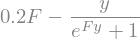

In [65]:
reg_log_loss_grad_sy = sp.expand(reg_log_loss_sy.diff(F_sy))
reg_log_loss_grad_sy

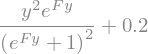

In [66]:
reg_log_loss_hess_sy = reg_log_loss_grad_sy.diff(F_sy)
reg_log_loss_hess_sy

**Note:** : y can take +1 or -1 so $y^2$ is always be 1.

In [67]:
reg_log_loss_func = sp.lambdify((y_sy,F_sy),reg_log_loss_sy,modules="numpy")
inspect.getsource(reg_log_loss_func)

'def _lambdifygenerated(y, F):\n    return 0.1*F**2 + log(1 + exp(-F*y))\n'

In [68]:
reg_log_loss_grad_func = sp.lambdify((y_sy,F_sy),reg_log_loss_grad_sy,modules="numpy")
inspect.getsource(reg_log_loss_grad_func)

'def _lambdifygenerated(y, F):\n    return 0.2*F - y/(exp(F*y) + 1)\n'

In [69]:
reg_log_loss_hess_func = sp.lambdify((y_sy,F_sy),reg_log_loss_hess_sy,modules="numpy")
inspect.getsource(reg_log_loss_hess_func)

'def _lambdifygenerated(y, F):\n    return y**2*exp(F*y)/(exp(F*y) + 1)**2 + 0.2\n'

### Implementing newton boosting

In [70]:
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize_scalar

class Boosting(BaseEstimator):
    def __init__(self,n_estimators=10,use_newton=True):
        self.estimators_ = None
        self.n_estimators = n_estimators
        self.use_newton = use_newton

    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.estimators_ = np.empty(shape=(self.n_estimators,3),dtype="O")
        F = np.full((n_samples,),0.0)

        for t in range(self.n_estimators):
            if self.use_newton:
                # weighted(hessian) residual(negative gradient)
                residuals = - reg_log_loss_grad_func(y,F) / reg_log_loss_hess_func(y,F)
            else:
                # unweighted residual
                residuals = - reg_log_loss_grad_func(y,F)

            # weak learner as stumps
            h = DecisionTreeRegressor(max_depth=1)

            # train the weak learner using the residual
            h.fit(X,residuals)

            hreg = h.predict(X)

            # find best step
            loss = lambda a : np.linalg.norm(y - (F+a *hreg))**2
            step = minimize_scalar(loss,method="golden")
            a = step.x

            # update the ensemble prediction
            F += a * hreg
            self.estimators_[t] = np.array([a,h,residuals])

        return self

    def predict(self,X):
        y_pred_ = np.zeros((X.shape[0],))
        for a,h,_ in self.estimators_:
            y_pred_ += a * h.predict(X)

        return np.sign(y_pred_)




In [71]:
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=200,noise=0.15,random_state=13)
y = 2*y -1

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=11)

In [72]:
from sklearn.metrics import accuracy_score

newton_boosting = Boosting(n_estimators=25,use_newton=True)
newton_boosting.fit(X_train,y_train)
y_pred_nb = newton_boosting.predict(X_test)
print(f"Newton Boosting test error : {1- accuracy_score(y_test,y_pred_nb):.2%}")

Newton Boosting test error : 8.00%


In [73]:
gradient_boosting = Boosting(n_estimators=25,use_newton=False)
gradient_boosting.fit(X_train,y_train)
y_pred_gb = gradient_boosting.predict(X_test)
print(f"Gradient Boosting test error : {1- accuracy_score(y_test,y_pred_gb):.2%}")

Gradient Boosting test error : 12.00%


In [74]:
esp = 0.25
x_min, x_max, y_min, y_max = X[:, 0].min() , X[:, 0].max() ,X[:, 1].min(), X[:, 1].max()

for i in [0,1,2]:
    plt.figure(figsize=(8,4))
    #hessian weighted Neg. Gradient
    ax = plt.subplot(122,projection="3d")
    plt.setp(ax,title="hessian weighted Neg. Gradient",
             xlabel="$x_1$",ylabel="$x_2$",zlabel="residuals",
             xlim=(x_min-esp,x_max+esp),ylim=(y_min-esp,y_max+esp),zlim=(-2,2))
    plot_surface(ax,newton_boosting.estimators_[i][1].predict,x_min, x_max, y_min, y_max,{},predict=True,cmap="RdBu")
    ax.scatter(X_train[:,0],X_train[:,1],newton_boosting.estimators_[i][2],c=y_train,cmap="RdBu",alpha=0.5,edgecolor="k")
    ax.view_init(elev=0,azim=0)

    #Neg. Gradient
    ax = plt.subplot(121,projection="3d")
    plt.setp(ax,title="Neg. Gradient",
             xlabel="$x_1$",ylabel="$x_2$",zlabel="residuals",
             xlim=(x_min-esp,x_max+esp),ylim=(y_min-esp,y_max+esp),zlim=(-2,2))
    plot_surface(ax,gradient_boosting.estimators_[i][1].predict,x_min, x_max, y_min, y_max,{},predict=True,cmap="RdBu")
    ax.scatter(X_train[:,0],X_train[:,1],gradient_boosting.estimators_[i][2],c=y_train,cmap="RdBu",alpha=0.5,edgecolor="k")
    ax.view_init(elev=0,azim=0)

    plt.suptitle(f"Iteration {i}")
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

the very first iteration, the impact of Hessian weighting is immediately observable. Using second derivative information to weight the residuals increases the separation between the two classes, making them easier to discriminate between.

Hessian weighting enables greater stratification of misclassification, enabling the weak learning algorithm to construct more effective weak learners.

>In summary, Newton boosting aims to use both first derivative (gradient) information and second derivative (Hessian) information to ensure that misclassified training examples receive increased attention dependent on the extent of the misclassification.

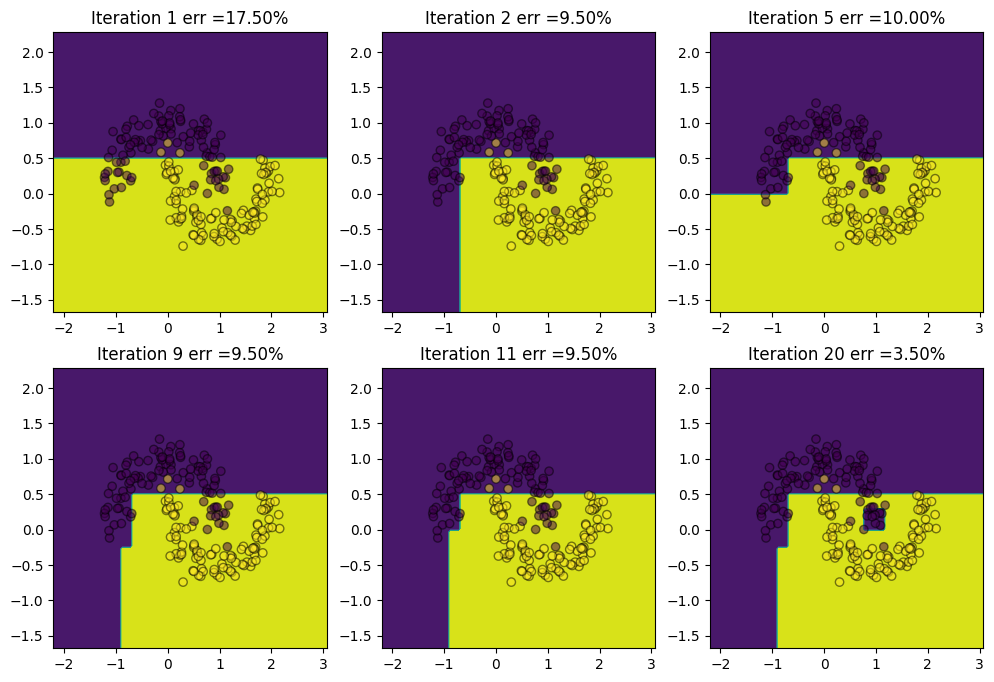

In [75]:
from sklearn.inspection import DecisionBoundaryDisplay
%matplotlib inline
plt.figure(figsize=(12,8))
for plt_idx,i in enumerate([1,2,5,9,11,20],start=1):
    ax = plt.subplot(2,3,plt_idx)
    newton_boosting = Boosting(n_estimators=i,use_newton=True)
    newton_boosting.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y,newton_boosting.predict(X))
    ax.set_title(f"Iteration {i} err ={test_error:.2%}")
    DecisionBoundaryDisplay.from_estimator(newton_boosting,X_train,response_method="predict",ax=ax,plot_method="contourf")
    ax.scatter(X[:,0],X[:,1],c=y,alpha=0.5,edgecolors="k")
plt.show()